### Завдання.
Використовуючи модель ARIMA і датасет Yearly sunspots data 1700-2008
побудуйте прогноз на 2009-2030 р.р.


In [18]:
import warnings
import itertools
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from adtk.detector import ThresholdAD
from adtk.visualization import plot
import warnings
warnings.filterwarnings("ignore")
from pmdarima import auto_arima

In [19]:
sa_data = sm.datasets.sunspots.load_pandas()
say = sa_data.data
say['YEAR'] = pd.to_datetime(say['YEAR'], format='%Y')
say.tail()

,YEAR,SUNACTIVITY
304,2004-01-01,40.4
305,2005-01-01,29.8
306,2006-01-01,15.2
307,2007-01-01,7.5
308,2008-01-01,2.9


In [74]:
s = say.set_index(say.YEAR).drop(['YEAR'], axis=1)
sa = pd.Series(s.SUNACTIVITY)
sa[-5:]

YEAR
2004-01-01    40.4
2005-01-01    29.8
2006-01-01    15.2
2007-01-01     7.5
2008-01-01     2.9
Name: SUNACTIVITY, dtype: float64

##### Візуалізація даних і аномалій.

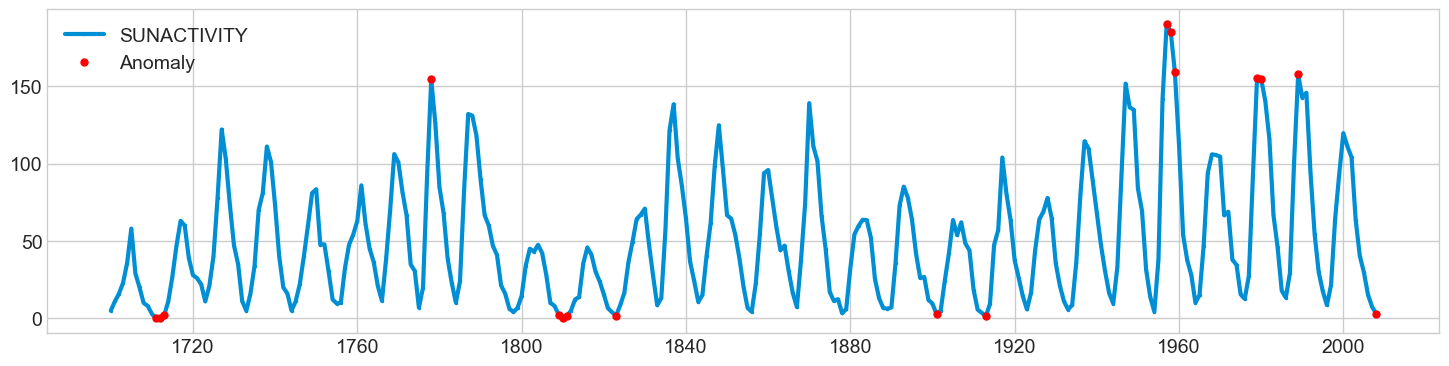

In [76]:
threshold_ad = ThresholdAD(high=153, low=3)
anomalies = threshold_ad.detect(sa)
plot(sa, anomaly=anomalies, ts_linewidth=3, 
     ts_markersize=3,
     anomaly_markersize=5,
     anomaly_color='red',
     anomaly_tag="marker");

##### На графіку можемо спостерігати боковий тренд і певну циклічність сонячної активності з періодом 10-14 років, тому спробуємо використати модель SARIMAX.

In [22]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 11) for x in pdq] 

In [23]:
warnings.filterwarnings("ignore")
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(sa,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}11 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

ARIMA(0, 0, 0)x(0, 0, 0, 11)11 - AIC:3439.710598624912
ARIMA(0, 0, 0)x(0, 0, 1, 11)11 - AIC:3118.527349134214
ARIMA(0, 0, 0)x(0, 1, 0, 11)11 - AIC:2919.0838255745507
ARIMA(0, 0, 0)x(0, 1, 1, 11)11 - AIC:2803.560614172884
ARIMA(0, 0, 0)x(1, 0, 0, 11)11 - AIC:2915.5630057196067
ARIMA(0, 0, 0)x(1, 0, 1, 11)11 - AIC:2902.409638999864
ARIMA(0, 0, 0)x(1, 1, 0, 11)11 - AIC:2817.8910308658983
ARIMA(0, 0, 0)x(1, 1, 1, 11)11 - AIC:2786.86433315639
ARIMA(0, 0, 1)x(0, 0, 0, 11)11 - AIC:3096.1208215078323
ARIMA(0, 0, 1)x(0, 0, 1, 11)11 - AIC:2847.418558098153
ARIMA(0, 0, 1)x(0, 1, 0, 11)11 - AIC:2715.516529390419
ARIMA(0, 0, 1)x(0, 1, 1, 11)11 - AIC:2588.291365946571
ARIMA(0, 0, 1)x(1, 0, 0, 11)11 - AIC:2712.2688823167646
ARIMA(0, 0, 1)x(1, 0, 1, 11)11 - AIC:2681.641837103416
ARIMA(0, 0, 1)x(1, 1, 0, 11)11 - AIC:2618.2864198114703
ARIMA(0, 0, 1)x(1, 1, 1, 11)11 - AIC:2573.265025975983
ARIMA(0, 1, 0)x(0, 0, 0, 11)11 - AIC:2824.8598075257105
ARIMA(0, 1, 0)x(0, 0, 1, 11)11 - AIC:2667.934440574948
ARIM

In [24]:
results.aic

2501.376400160905

In [25]:
model = sm.tsa.statespace.SARIMAX(sa, 
                                order=(1, 1, 1), 
                                seasonal_order=(1, 1, 1, 11), 
                                enforce_stationarity=False, 
                                enforce_invertibility=False)
results = model.fit()

In [26]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        SUNACTIVITY   No. Observations:                  309
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 11)   Log Likelihood               -1245.688
Date:                            Mon, 13 Mar 2023   AIC                           2501.376
Time:                                    11:52:44   BIC                           2519.621
Sample:                                01-01-1700   HQIC                          2508.691
                                     - 01-01-2008                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3023      0.088      3.417      0.001       0.129       0.476
ma.L1          0.1819      0.092      1.980      0.048       0.002       0.362
ar.S.L11       0.0145      0.028      0.524      0.600      -0.040       0.069
ma.S.L11      -0.8807      0.048    -18.283      0.000      -0.975      -0.786
sigma2       364.4575     24.049     15.155      0.000     317.323     411.592
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                38.14
Prob(Q):                              0.80   Prob(JB):                         0.00
Heteroskedasticity (H):               1.62   Skew:                             0.29
Prob(H) (two-sided):                  0.02   Kurtosis:                         4.70
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

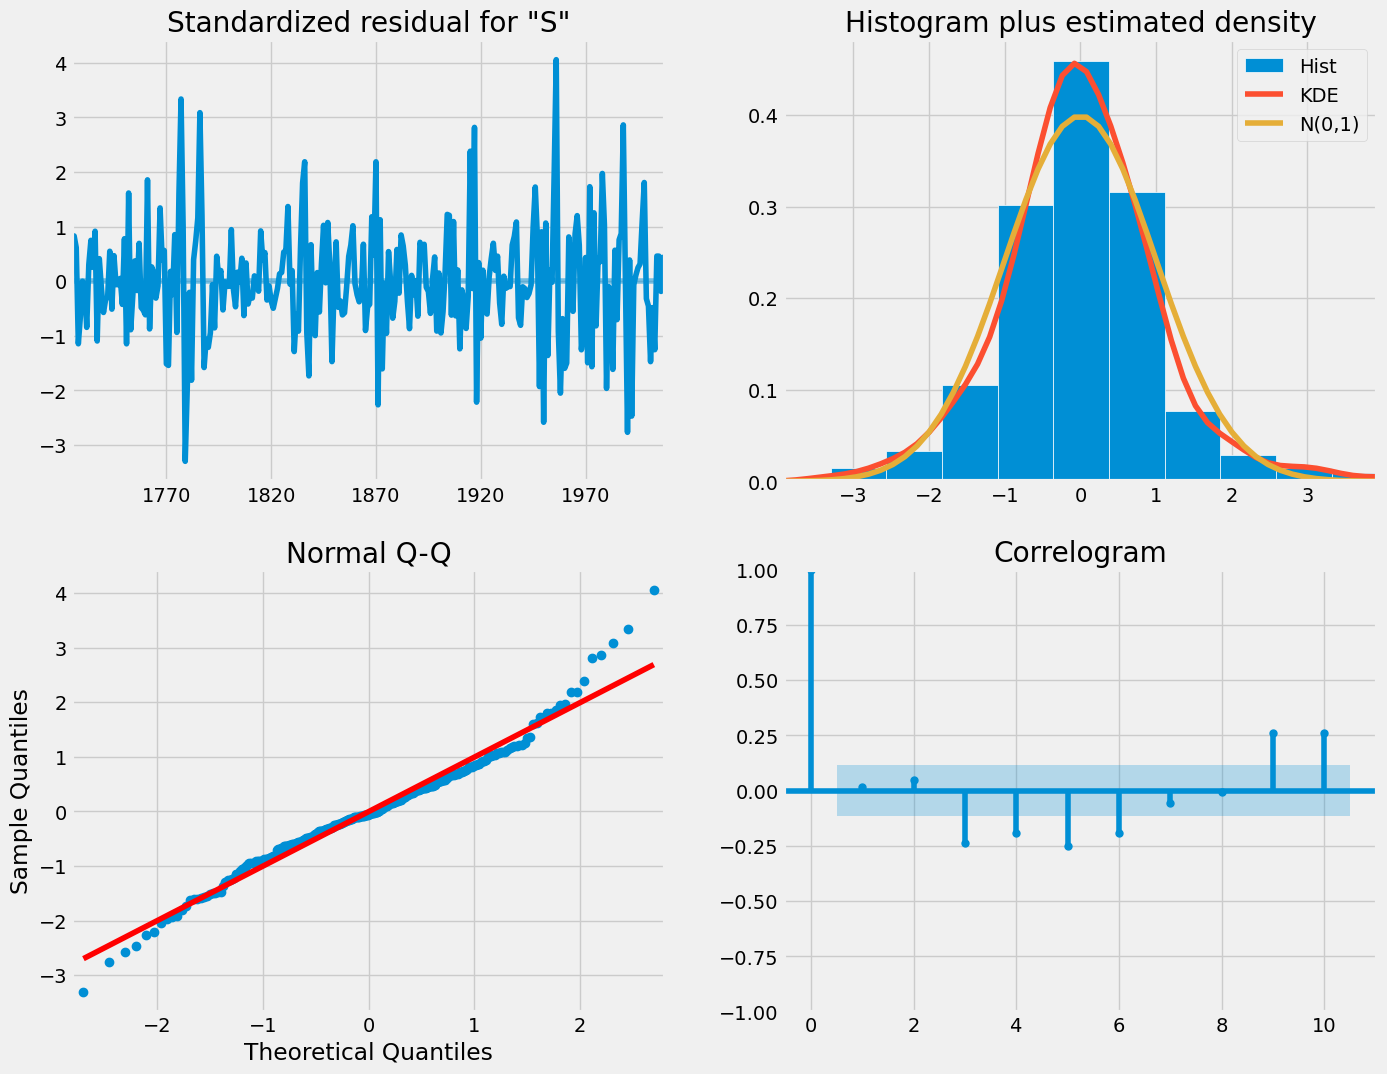

In [27]:
results.plot_diagnostics(figsize=(15, 12))
plt.show()

##### Гістограма щільності розподілу має нормальний вигляд, графік КК нормальності достатньо добре лягає на пряму.

In [28]:
pred = results.get_prediction(start=pd.to_datetime('1980'), end='2009-01-01', dynamic=False)
pred_ci = pred.conf_int()
pred_ci.head()

,lower SUNACTIVITY,upper SUNACTIVITY
1980-01-01,154.681165,229.531222
1981-01-01,104.853705,179.703763
1982-01-01,84.563349,159.413406
1983-01-01,60.034600,134.884657
1984-01-01,-2.361440,72.488617


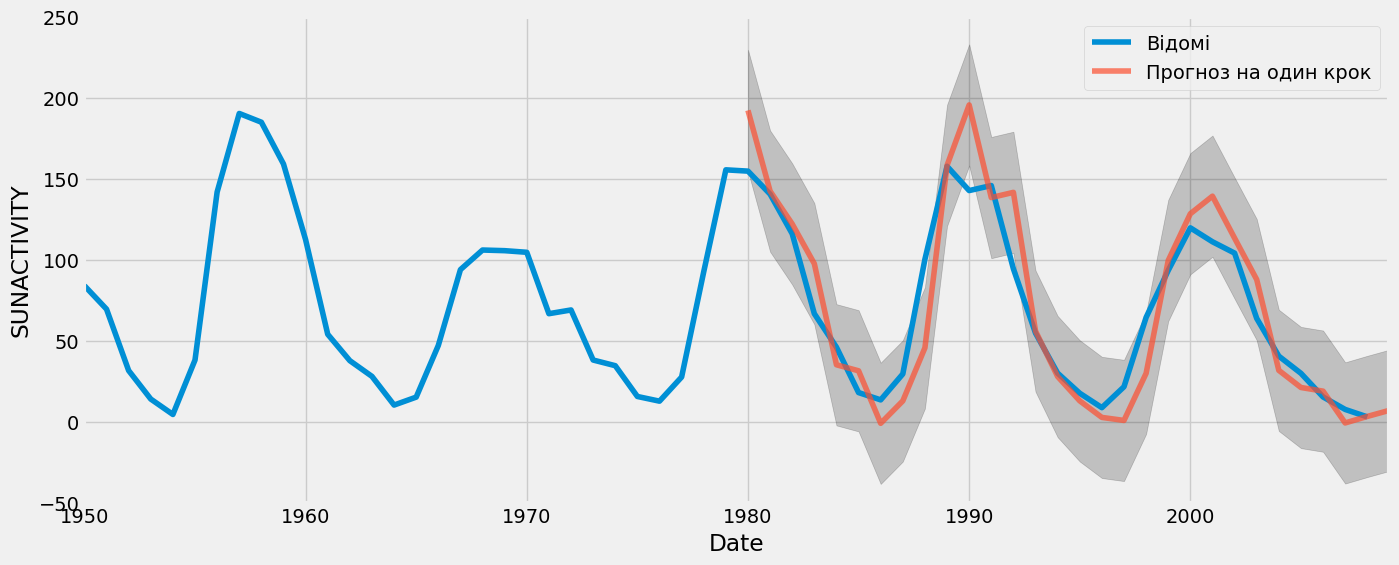

In [29]:
plt.figure(figsize=(15,6))
ax = sa['1950':].plot(label='Відомі')
pred.predicted_mean.plot(ax=ax, label='Прогноз на один крок', alpha=.7)
ax.fill_between(pred_ci.index,
pred_ci.iloc[:, 0],
pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('SUNACTIVITY')
ax.set_ylim(bottom=-50, top= 250)
plt.legend()
plt.show()

In [30]:
sa_forecasted = pred.predicted_mean
sa_truth = sa['1980-01-01':]
mse = ((sa_forecasted - sa_truth) ** 2).mean()
print('Середня квадратична похибка прогнозів = {}'.format(round(mse, 2)))

Середня квадратична похибка прогнозів = 508.3


In [31]:
pred_dynamic = results.get_prediction(start=pd.to_datetime('2000'), dynamic=True, full_results=True)
pred_dynamic_ci = pred_dynamic.conf_int()

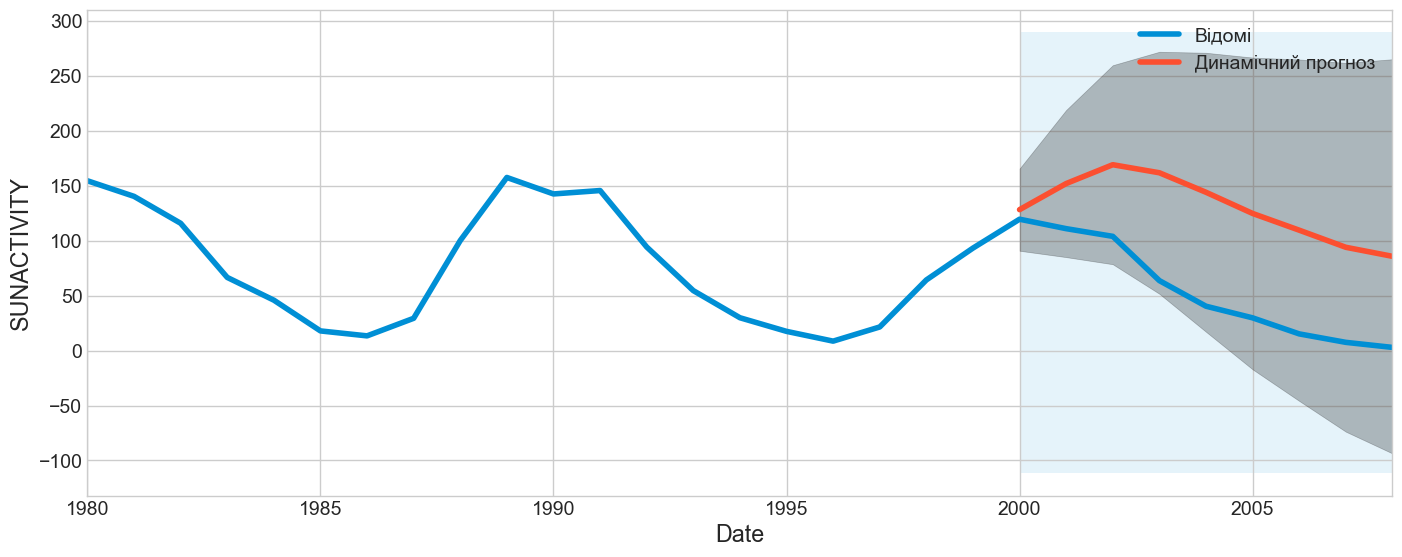

In [78]:
ax = sa['1980':].plot(label='Відомі', figsize=(15, 6))
pred_dynamic.predicted_mean.plot(label='Динамічний прогноз', ax=ax)
ax.fill_between(pred_dynamic_ci.index,
pred_dynamic_ci.iloc[:, 0],
pred_dynamic_ci.iloc[:, 1], color='k', alpha=.25)
ax.fill_betweenx(ax.get_ylim(), pd.to_datetime('2000-01-01'), sa.index[-1],
alpha=.1, zorder=-1)
ax.set_xlabel('Date')
ax.set_ylabel('SUNACTIVITY')
plt.legend()
plt.show()

In [33]:
pred_uc = results.get_forecast(steps=21)
pred_ci = pred_uc.conf_int()
pred_ci.head()

,lower SUNACTIVITY,upper SUNACTIVITY
2009-01-01,-30.471010,44.372302
2010-01-01,-43.602378,90.342881
2011-01-01,-36.364262,144.841422
2012-01-01,-36.742511,183.596402
2013-01-01,-39.694025,214.304175


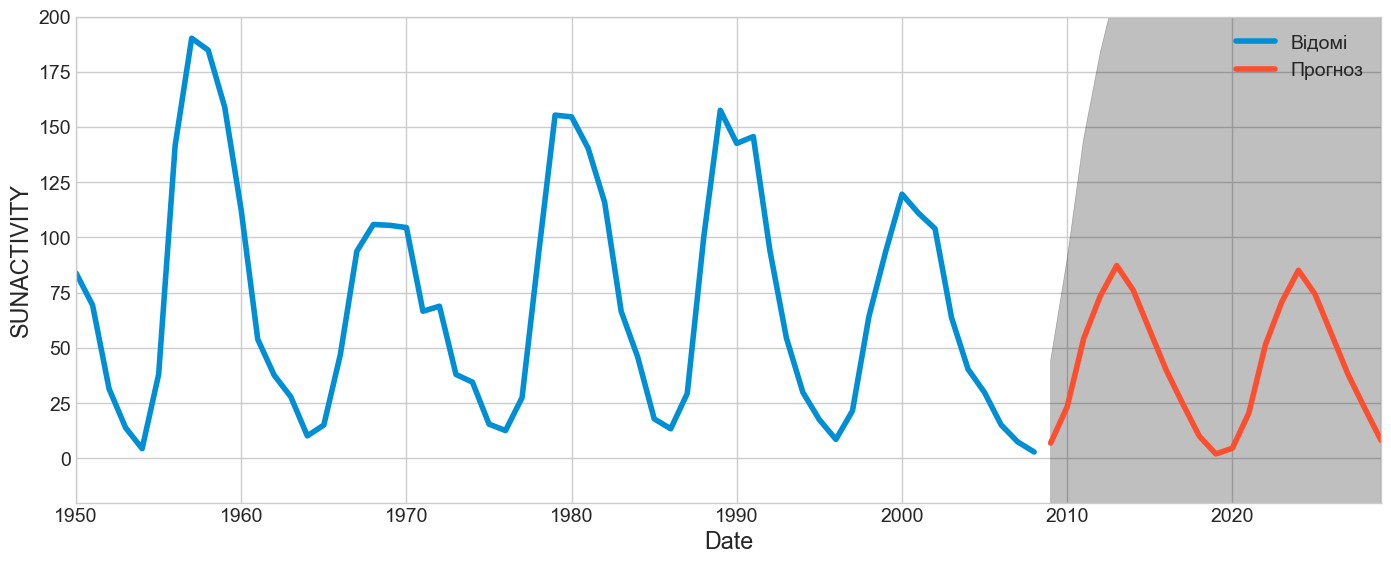

In [79]:
ax = sa['1950':].plot(label='Відомі', figsize=(15, 6))
pred_uc.predicted_mean.plot(ax=ax, label='Прогноз')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1],
                color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('SUNACTIVITY')
ax.set_ylim(bottom=-20, top = 200)
plt.legend()
plt.show()

### Висновок:
##### Емпіричним шляхом підібран параметр періодичності 11. Але все одно модель незадовільна, зважаючи на дуже високий показник середньої квадратичної похибки, яку демонструє модель на тестових даних, а також занадто широкий діапазон довірчого інтервалу. 